# Distance to public transport analysis

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import geopandas as gpd
import folium

import matplotlib.pyplot as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgaregurrola/Repos/observatorio-ciudades/accesibilidad-urbana/aup/data.py:24: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(


## Test split function

In [2]:
gdf_line = gpd.read_file('../../../data/external/transporte/zmm_tp_rutas.gpkg')
print(gdf_line.shape)
gdf_line.head(3)

(185, 10)


,fid,Name,altitudeMo,tessellate,extrude,visibility,sistema,nombre,layer,geometry
0,1,RUTA 340 PALMIRAS - CLINICA 17,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.42520 25.84269 0.0000...
1,2,RUTA 070 SECTOR 2 VIVIENDA POPULAR,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.23444 25.66089 0.0000...
2,3,RUTA 111 SECTOR 2 COLINAS DEL AEROPUERTO - CEN...,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,MULTILINESTRING Z ((-100.10483 25.82346 0.0000...


In [3]:
gdf_line = gdf_line.explode()
gdf_line

/tmp/ipykernel_58317/2252090428.py:1: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  gdf_line = gdf_line.explode()


,,fid,Name,altitudeMo,tessellate,extrude,visibility,sistema,nombre,layer,geometry
0,0,1,RUTA 340 PALMIRAS - CLINICA 17,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.42520 25.84269 0.00000, -10..."
1,0,2,RUTA 070 SECTOR 2 VIVIENDA POPULAR,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.23444 25.66089 0.00000, -10..."
2,0,3,RUTA 111 SECTOR 2 COLINAS DEL AEROPUERTO - CEN...,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.10483 25.82346 0.00000, -10..."
3,0,4,RUTA 318 NEXXUS - PILARES POR CARR. A LAREDO,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.24192 25.91912 0.00000, -10..."
4,0,5,RUTA 208 SECTOR 1 ESCOBEDO - SAN RAFAEL,clampToGround,1.0,0.0,-1.0,Ruta,None,zmm_tp_rutaspimus,"LINESTRING Z (-100.37225 25.77040 0.00000, -10..."
...,...,...,...,...,...,...,...,...,...,...,...
180,0,28,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Diego Díaz de Berlanga,zmm_tp_transmetro,"LINESTRING Z (-100.28091 25.72036 0.00000, -10..."
181,0,29,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Los Pinos,zmm_tp_transmetro,"LINESTRING Z (-100.27756 25.71104 0.00000, -10..."
182,0,30,None,None,NaN,NaN,NaN,Transmetro,Hospital Metropolitano - Casa Blanca,zmm_tp_transmetro,"LINESTRING Z (-100.27755 25.71103 0.00000, -10..."
183,0,31,None,None,NaN,NaN,NaN,Transmetro,Mitras - Villas de San Francisco,zmm_tp_transmetro,"LINESTRING Z (-100.34412 25.69184 0.00000, -10..."


In [4]:
gdf_line['geometry'] = shapely.force_2d(gdf_line['geometry'])

NameError: name 'shapely' is not defined

In [ ]:
gdf_line = gdf_line.to_crs("EPSG:6372")

In [ ]:
gdf_line.head(2)

In [ ]:
gdf_line = gdf_line.reset_index(drop=True)

In [ ]:
import shapely

In [ ]:
shapely.segmentize(gdf_line.geometry, max_segment_length=100)

In [ ]:
distances = np.arange(0, 
                      gdf_line.iloc[0].geometry.length, 400)

In [ ]:
distances

In [ ]:
gdf_line.iloc[0].geometry.coords

In [ ]:
from shapely import MultiPoint
MultiPoint([gdf_line.iloc[0].geometry.interpolate(distance) for distance in distances] + [gdf_line.iloc[0].geometry.boundary[1]])

In [ ]:
gdf_line.iloc[0].geometry.xy[1][1]

In [ ]:
gdf_line.iloc[0].geometry.boundary.explode()

In [ ]:
 MultiPoint([line.interpolate(distance) for distance in distances] + [line.boundary[1]])

## Distance to public transport

### Municipality data

In [2]:
cities = ['Guadalajara', 'Monterrey', 'CDMX']

In [3]:
schema = 'hexgrid'
table = 'hexgrid_8_city_2020'
query = f"SELECT * FROM {schema}.{table} WHERE \"city\" = \'{cities[0]}\'"
hex_polygon = aup.gdf_from_query(query)

### Network data

In [4]:
G,nodes,edges = aup.graph_from_hippo(hex_polygon, schema='osmnx', edges_folder='edges_speed', nodes_folder='nodes')

<AxesSubplot: >

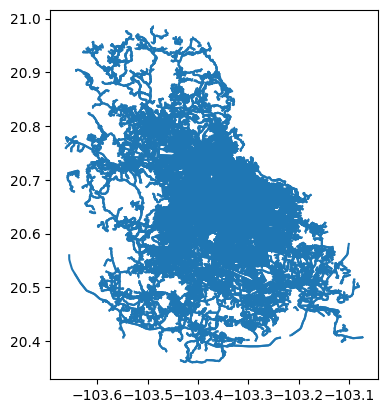

In [5]:
edges.plot()

### Public transport stops

In [6]:
paradas_gdf = gpd.read_file('../../../data/external/transporte/amg_tp_paradas.gpkg')
print(paradas_gdf.shape)
paradas_gdf.head(2)

(9203, 4)


,stop_id,stop_name,route_ids,geometry
0,mxa_T06_03_STP_09,Calle Pablo Valdez,T06-03,POINT (-103.27734 20.67448)
1,mxa_T06_03_STP_16,Calle Esteban Alatorre,T06-03,POINT (-103.29438 20.67253)


## Time analysis

In [8]:
nodes_tp = aup.pois_time(G, nodes, edges, paradas_gdf, 'tp', 'time_min', count_pois=(True, 15))

Found and assigned nearest node osmid to each tp.
Starting time analysis for tp.
Starting range k = 1 of 47 for tp.
Starting range k = 2 of 47 for tp.
Starting range k = 3 of 47 for tp.
Starting range k = 4 of 47 for tp.
Starting range k = 5 of 47 for tp.
Starting range k = 6 of 47 for tp.
Starting range k = 7 of 47 for tp.
Starting range k = 8 of 47 for tp.
Starting range k = 9 of 47 for tp.
Starting range k = 10 of 47 for tp.
Starting range k = 11 of 47 for tp.
Starting range k = 12 of 47 for tp.
Starting range k = 13 of 47 for tp.
Starting range k = 14 of 47 for tp.
Starting range k = 15 of 47 for tp.
Starting range k = 16 of 47 for tp.
Starting range k = 17 of 47 for tp.
Starting range k = 18 of 47 for tp.
Starting range k = 19 of 47 for tp.
Starting range k = 20 of 47 for tp.
Starting range k = 21 of 47 for tp.
Starting range k = 22 of 47 for tp.
Starting range k = 23 of 47 for tp.
Starting range k = 24 of 47 for tp.
Starting range k = 25 of 47 for tp.
Starting range k = 26 of 47 

In [10]:
nodes_tp.to_file('../../../data/external/transporte/nodes_tp_amg.geojson')